We will make machine learning simple linear regression using titanic data column Age and Sex

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

# 1.Data Profiling

In [2]:
titanic = pd.read_csv(r"C:\Users\HP\1.Myedusolve\3.Machine Learning\Versi Indo\Titanic.csv")

In [3]:
df = titanic[['Sex','Age']]
df

,Sex,Age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
...,...,...
886,male,27.0
887,female,19.0
888,female,NaN
889,male,26.0


In [4]:
df.isna().sum()

Sex      0
Age    177
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     891 non-null    object 
 1   Age     714 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.0+ KB


# 2.Data Cleansing

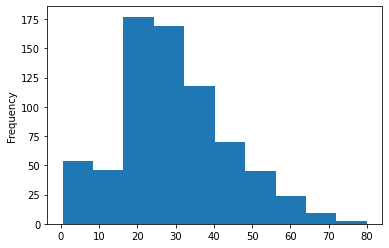

In [6]:
df['Age'].plot(kind='hist');

In [7]:
# Using the median because the data spread is wide so it doesn't use the mean
val = df['Age'].median()
df['Age'] = df['Age'].fillna(val)

In [8]:
df.isna().sum()

Sex    0
Age    0
dtype: int64

The data type is correct and the missing value no longer exists. So, the data can be said to be clean

# 3.Data Exploration

In [9]:
df.describe()

,Age
count,891.000000
mean,29.361582
std,13.019697
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


In [10]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})
df

,Sex,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
...,...,...
886,0,27.0
887,1,19.0
888,1,28.0
889,0,26.0


# 4.Feature Engineering

## 4.1 Preprocessing Modeling

In [12]:
x = df.drop(['Age'],axis=1)
y = df['Age']

## 4.2 Splitting Training and Test Set

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 42)

# 5.Modeling (Machine Learning Regression - Simple Linear Regression)

In [14]:
regressor = LinearRegression()

In [15]:
regressor.fit(x_train,y_train)

LinearRegression()

In [16]:
regressor.coef_

array([-2.17499716])

* Predict The Result

In [17]:
y_pred = regressor.predict(x_test)

* Plot The Result

In [18]:
result = pd.DataFrame({'Actual':y_test,'Predict':y_pred})
result

,Actual,Predict
709,28.0,29.952548
439,31.0,29.952548
840,20.0,29.952548
720,6.0,27.777551
39,14.0,27.777551
...,...,...
433,17.0,29.952548
773,28.0,29.952548
25,38.0,27.777551
84,17.0,27.777551


<function matplotlib.pyplot.show(close=None, block=None)>

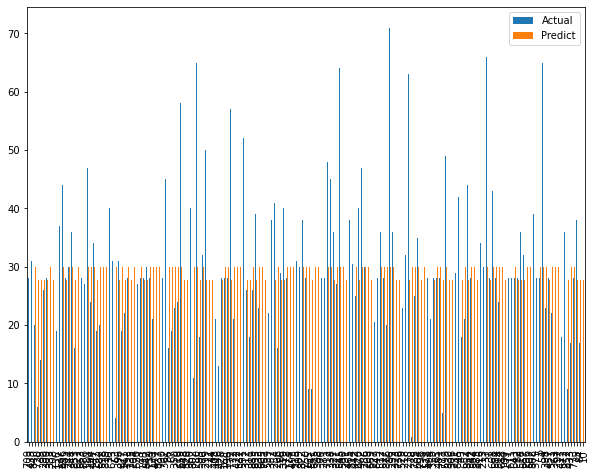

In [19]:
result.plot(kind = 'bar',figsize = (10,8))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

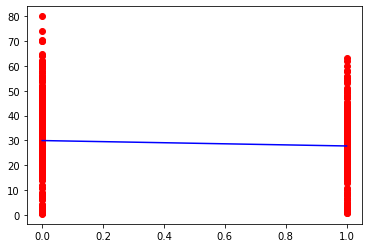

In [20]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test.values ,y_pred,color = 'blue')
plt.show

This shows that it does not meet the requirements to use the simple linear regression model even though it fulfills the requirements to use continuous data. Also, it means that the Age and Sex columns do not have a linear relationship.

# 6.Evaluate Model

In [21]:
# View the average error
mean_absolute_error(y_test, y_pred)

9.358451303289968

In [22]:
# Determine whether the error is large or small
mean_absolute_percentage_error(y_test,y_pred)

0.6481603270862951